In [107]:
import numpy as np 
import random 
import scipy as sp 
from pandas import Series,DataFrame 
import pandas as pd 
import time 

import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

import sklearn 

In [108]:
df = pd.read_csv('train.tsv',encoding='utf-8',delimiter = '\t')
df_test = pd.read_csv('test.tsv',encoding='utf-8',delimiter = '\t')

In [109]:
df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,M,0.530,0.435,0.155,0.6990,0.2880,0.1595,0.205,10
1,3,F,0.710,0.565,0.195,1.8170,0.7850,0.4920,0.490,11
2,7,F,0.625,0.520,0.180,1.3540,0.4845,0.3510,0.375,11
3,12,M,0.375,0.280,0.095,0.2225,0.0875,0.0430,0.080,10
4,16,I,0.415,0.330,0.090,0.3595,0.1700,0.0810,0.090,6


In [110]:
df_test.head()

,id,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1,F,0.710,0.570,0.195,1.9805,0.9925,0.4925,0.4800
1,2,F,0.485,0.395,0.160,0.6600,0.2475,0.1280,0.2350
2,4,M,0.700,0.580,0.205,2.1300,0.7415,0.4900,0.5800
3,5,F,0.670,0.525,0.190,1.5270,0.5755,0.3530,0.4400
4,6,I,0.435,0.300,0.120,0.5965,0.2590,0.1390,0.1645


In [111]:
df= df.drop('id',axis=1)

In [112]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.530,0.435,0.155,0.6990,0.2880,0.1595,0.205,10
1,F,0.710,0.565,0.195,1.8170,0.7850,0.4920,0.490,11
2,F,0.625,0.520,0.180,1.3540,0.4845,0.3510,0.375,11
3,M,0.375,0.280,0.095,0.2225,0.0875,0.0430,0.080,10
4,I,0.415,0.330,0.090,0.3595,0.1700,0.0810,0.090,6


In [113]:
df.isnull().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Rings             False
dtype: bool

欠損なし

In [114]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986119,0.772889,0.927385,0.898868,0.903773,0.899846,0.565930
Diameter,0.986119,1.000000,0.778407,0.927894,0.895383,0.900561,0.906198,0.581200
Height,0.772889,0.778407,1.000000,0.766687,0.727685,0.748535,0.761374,0.516339
Whole weight,0.927385,0.927894,0.766687,1.000000,0.968401,0.965136,0.957241,0.546150
Shucked weight,0.898868,0.895383,0.727685,0.968401,1.000000,0.929653,0.882338,0.431183
Viscera weight,0.903773,0.900561,0.748535,0.965136,0.929653,1.000000,0.908622,0.508487
Shell weight,0.899846,0.906198,0.761374,0.957241,0.882338,0.908622,1.000000,0.629028
Rings,0.565930,0.581200,0.516339,0.546150,0.431183,0.508487,0.629028,1.000000


In [115]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

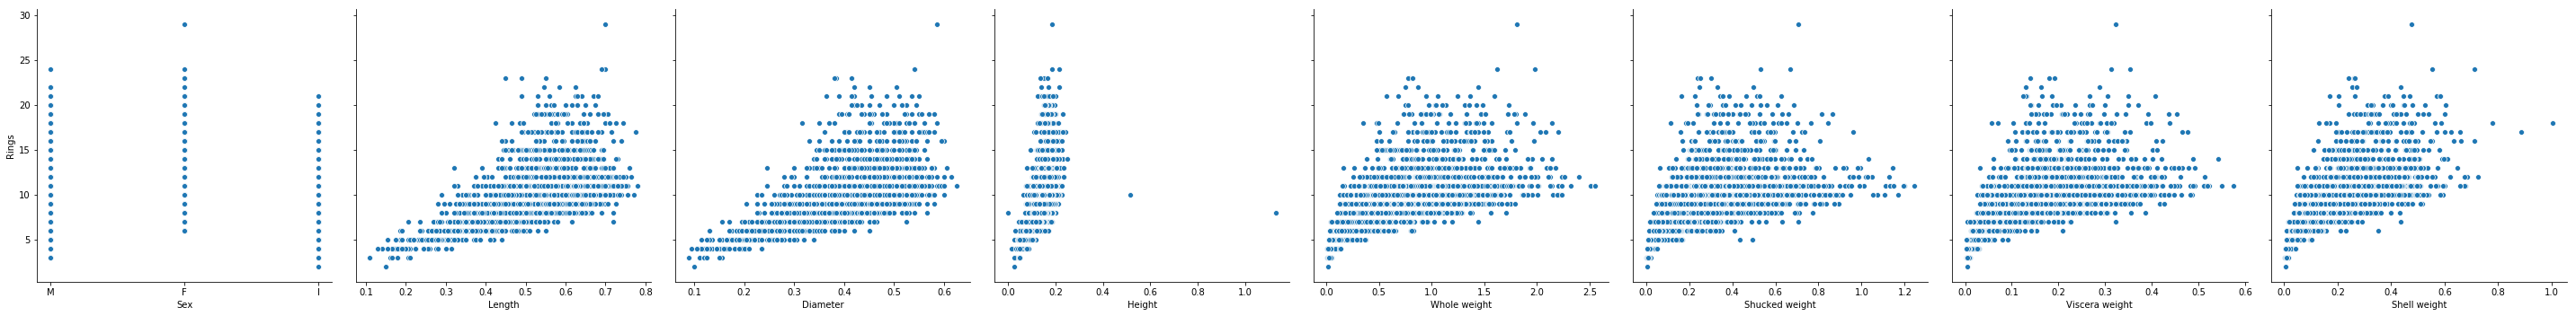

In [116]:
sns.pairplot(df,height= 5,x_vars=('Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight' ),y_vars='Rings')

#'Length','Height', 'Whole weight'

In [117]:
X = df[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight' ]]

X_test = df_test[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight' ]]

from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

sc = StandardScaler()
X_std = sc.fit_transform(X)
pca=PCA(n_components=3)
pca.fit(X_std)
X_pca = pca.transform(X_std)

sc_test = StandardScaler()
X_test_std = sc.fit_transform(X_test)
pca=PCA(n_components=3)
pca.fit(X_test_std)
X_test_pca = pca.transform(X_test_std)


In [118]:
#次元を低くしたデータを可視化する
X_pca = pd.DataFrame(X_pca,columns=['pc1','pc2','pc3'])

#上のデータに目的変数(cancer.target)を紐づける、横に結合する
X_pca = pd.concat([X_pca,pd.DataFrame(df['Rings'],columns=['Rings'])],axis=1)


In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [120]:
y = df['Rings']
X_new = X_pca[['pc1','pc2','pc3']]

In [121]:
X_train = X_new
X_test  = X_test_pca
y_train = y


#前処理
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [122]:
model = LinearRegression()
model.fit(X_train,y_train)
print(model.score(X_train,y_train))


0.36125306621414166


In [123]:
print(X_pca.shape)
print(X_test_pca.shape)

(2088, 4)
(2089, 3)


In [125]:
y_pred = model.predict(X_test)
print(y_pred)

[14.87111455  8.47469072 13.63248282 ... 12.04184108  9.9845542
 11.0344598 ]


In [126]:
y_pred = pd.DataFrame(y_pred)

In [127]:
y_pred = pd.DataFrame(y_pred)
result = pd.concat([df_test['id'],y_pred],axis=1)